In [0]:
from google.colab import files
uploaded = files.upload()

Saving deliveries.csv to deliveries.csv
Saving matches.csv to matches.csv


In [0]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [0]:
deliv = pd.read_csv("deliveries.csv")deliv = pd.read_csv("deliveries.csv")
mat  = pd.read_csv("matches.csv")

## **Cleaning and Transformtion**

In [0]:
mat.drop('umpire3',axis=1,inplace=True)
mat=mat.replace('Rising Pune Supergiants','Rising Pune Supergiant')
deliv.fillna(0,inplace=True)
mat['winner'].fillna('Draw',inplace=True)
mat['city'].fillna('Mumbai',inplace=True)
mat['player_of_match'].fillna('No one',inplace=True)
mat['umpire2'].fillna('SJA Taufel',inplace=True)
mat['umpire1'].fillna('HDPK Dharmasena',inplace=True)
#mat.columns = mat.columns.str.strip()
deliv.rename(columns={'match_id': 'id'}, inplace=True)

## Plot the following graph

**Maximum Toss Winners**

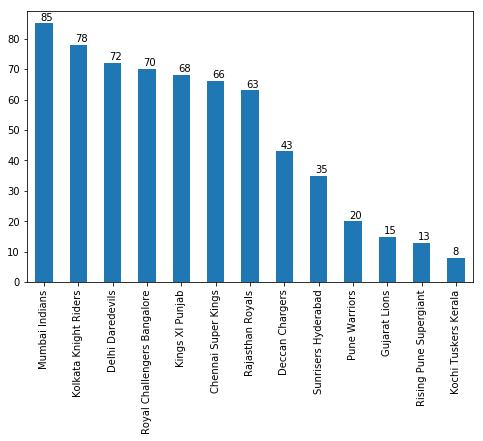

In [0]:
plt.subplots(figsize=(8,5))
ax=mat['toss_winner'].value_counts().plot.bar(width=0.5)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

**Toss Decision wrt Season**

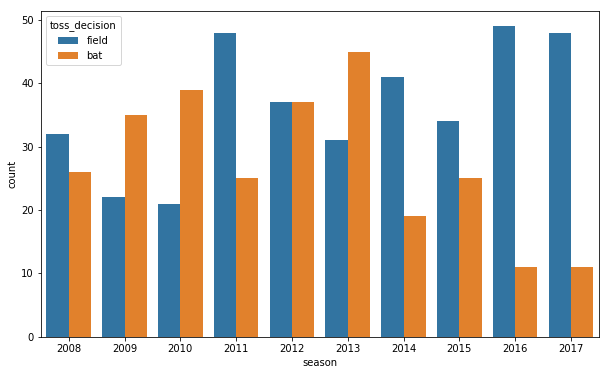

In [0]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=mat)
plt.show()

**Toss Decision wrt Team**

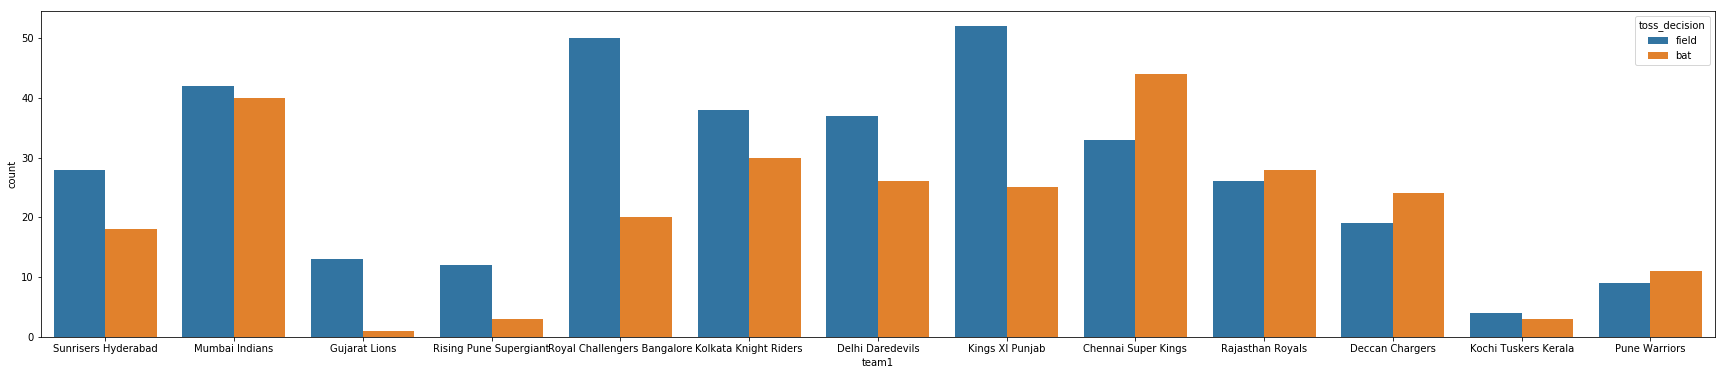

In [0]:
plt.subplots(figsize=(30,6))
sns.countplot(x='team1',hue='toss_decision',data=mat)
plt.show()

**Maximum Wins**

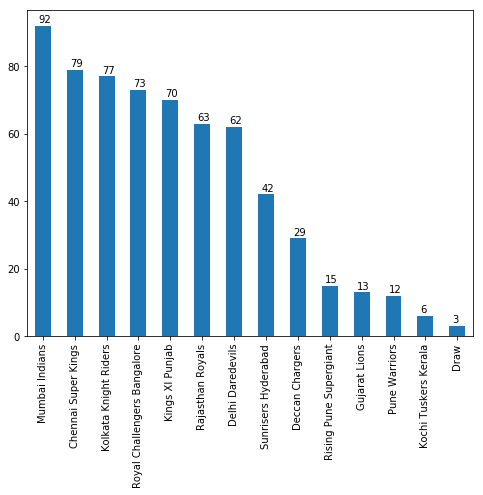

In [0]:
'''
mat['winner'].value_counts().plot.bar()
plt.title('Maximum WInners')
plt.xlabel('Teams')
plt.ylabel('Count')
'''
plt.subplots(figsize=(8,6))
wnrs = mat['winner'].value_counts().plot.bar(width=0.5)
for x in wnrs.patches:
  wnrs.annotate(format(x.get_height()),(x.get_x()+0.1,x.get_height()+1))
plt.show()

**Total Matches vs Wins for Teams**

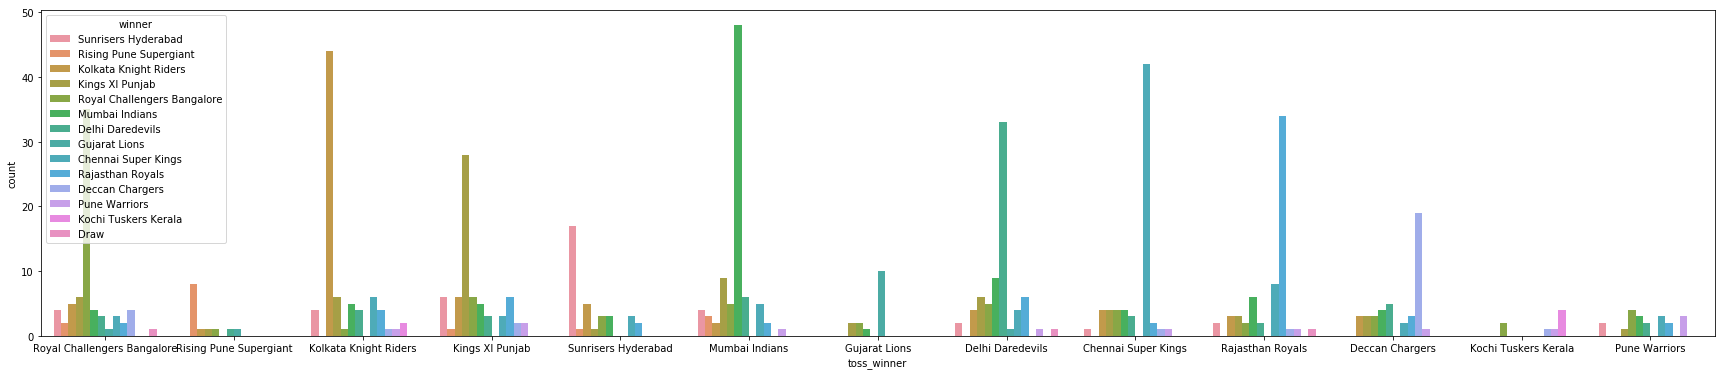

In [0]:
plt.subplots(figsize=(30,6))
sns.countplot(x='toss_winner',hue='winner',data=mat)
plt.show()

**Is Toss Winner Also the Match Winner?**

In [0]:
'''
c2 = mat[(mat.winner == mat.toss_winner)]
c2['winner'].value_counts().plot.bar()
plt.title('Percentage of Winning a match if toss is won')
plt.xlabel('Teams')
plt.ylabel('Percentage')
'''
#plt.subplots(figsize=(8,6))
c2 = mat[(mat.winner == mat.toss_winner)]
sall = len(mat.index)
sm=len(c2.index)
print("percentage of winning match if toss is won:-",(sm/sall)*100)
'''
wnrs = c2['winner'].value_counts().plot.bar(width=0.5)
for x in wnrs.patches:
  wnrs.annotate(format(x.get_height()),(x.get_x()+0.1,x.get_height()+1))
plt.show()
'''

percentage of winning match if toss is won:- 51.100628930817614


"\nwnrs = c2['winner'].value_counts().plot.bar(width=0.5)\nfor x in wnrs.patches:\n  wnrs.annotate(format(x.get_height()),(x.get_x()+0.1,x.get_height()+1))\nplt.show()\n"

In [0]:
d2mat = mat[['id','season']]
d2deliv = deliv[['id','batsman_runs']]
d2 = pd.merge(d2mat,d2deliv,on='id',how='inner')

**Sixes and Fours Across the Season**

In [0]:
d24 = d2[d2.batsman_runs == 4]
d26 = d2[d2.batsman_runs == 6]

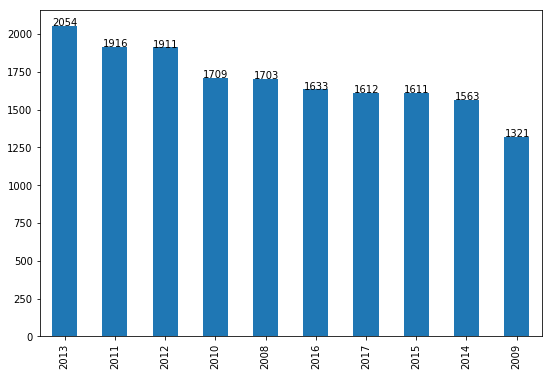

"\nplt.title('Fours in a season')\nplt.xlabel('seasons')\nplt.ylabel('Count')\n"

In [0]:
plt.subplots(figsize=(9,6))
d4 = d24['season'].value_counts().plot.bar(width=0.5)
for x in d4.patches:
  d4.annotate(format(x.get_height()),(x.get_x()+0.01,x.get_height()+1.05))
plt.show()
'''
plt.title('Fours in a season')
plt.xlabel('seasons')
plt.ylabel('Count')
'''

Text(0, 0.5, 'Count')

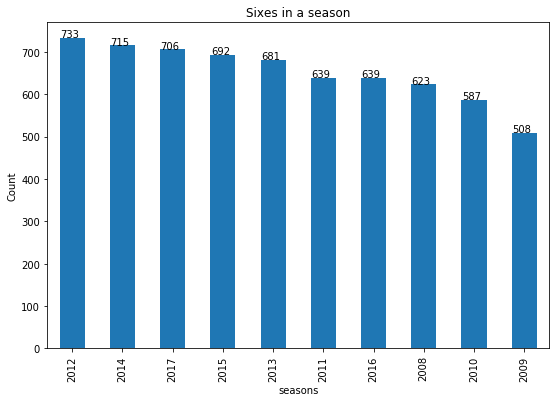

In [0]:
plt.subplots(figsize=(9,6))
d6 = d26['season'].value_counts().plot.bar(width=0.5)
for x in d6.patches:
  d6.annotate(format(x.get_height()),(x.get_x()+0.01,x.get_height()+1.5))
plt.title('Sixes in a season')
plt.xlabel('seasons')
plt.ylabel('Count')

**Runs Per Over By Teams Across Seasons**

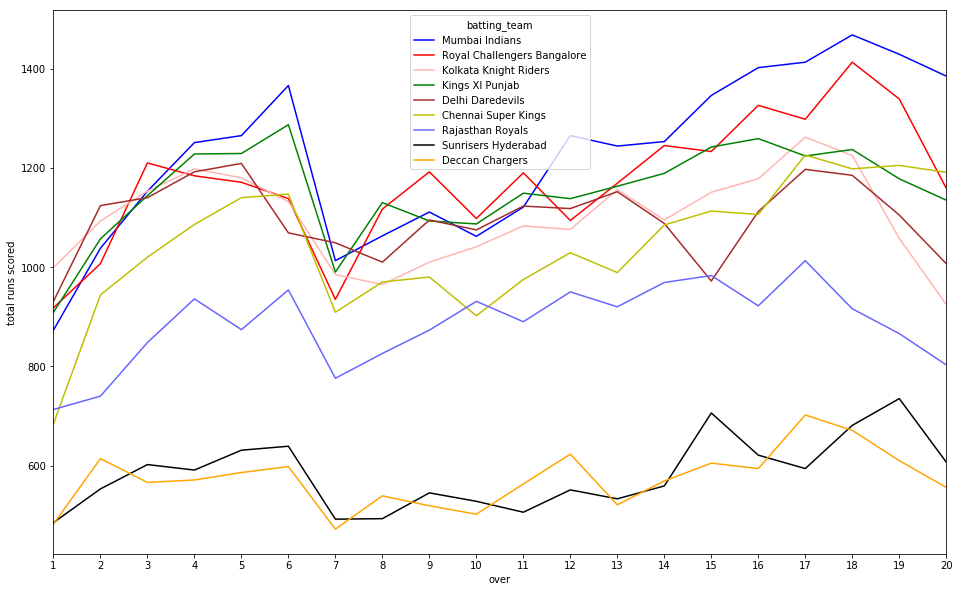

In [0]:
rpo = deliv.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
mpbt=pd.concat([mat['team1'],mat['team2']])
mpbt=mpbt.value_counts().reset_index()
mpbt.columns=['Team','Total Matches']
mpbt['wins']=mat['winner'].value_counts().reset_index()['winner']
mpbt.set_index('Team',inplace=True)
rpo[(mpbt[mpbt['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) 
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)
plt.ylabel('total runs scored')
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.show()


**Maximum Man Of Matches**

Text(0, 0.5, 'count')

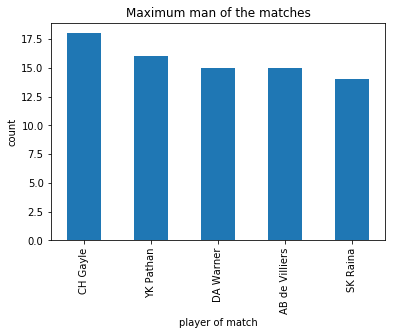

In [0]:
f2 = mat['player_of_match'].value_counts().head().plot.bar()
#ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))
plt.title("Maximum man of the matches")
plt.xlabel('player of match') 
plt.ylabel('count')

### Create a table with the following data also visualize if possible:

**Team Comparator**

In [0]:
a = 'Mumbai Indians'
b = 'Chennai Super Kings'
mt1=mat[(((mat['team1']==a)&(mat['team2']==b))|((mat['team1']==b)&(mat['team2']==a)))]
mt1 = mt1[['team1','team2','winner']]
tc = mt1.groupby(['team1','team2','winner']).size().reset_index().rename(columns={0:'count'})
tc.loc[0,'count'] = tc.loc[0,'count'] + tc.loc[2,'count']
tc.loc[1,'count'] = tc.loc[1,'count'] + tc.loc[3,'count']
tc.loc[0,'team1_wins'] = tc.loc[0,'count']
tc.loc[0,'team2_wins'] = tc.loc[1,'count']
tc.drop(['winner','count'],axis=1,inplace=True)
tc = tc[:1]
tc

,team1,team2,team1_wins,team2_wins
0,Chennai Super Kings,Mumbai Indians,10.0,12.0


**Matches Won By A Team Against Other Teams**

In [0]:
'''
def matwonagt(a):
  team_l = ['Sunrisers Hyderabad','Mumbai Indians','Gujarat Lions','Rising Pune Supergiants','Royal Challengers Bangalore','Kolkata Knight Riders','Delhi Daredevils','Kings XI Punjab','Chennai Super Kings','Rajasthan Royals','Deccan Chargers','Kochi Tuskers Kerala','Pune Warriors']
  team_l.remove(a)
  teams = team_l.copy()
  mt1=mat[((mat['team1']==a)|(mat['team2']==a))]
  mt1 = mt1[['team1','team2','winner']]
  mtag = mt1.groupby(['team1','team2','winner']).size().reset_index().rename(columns={0:'count'})
  mtag
  for i in range(0,len(mtag)):
    if mtag.loc[i,'team1'] != a:
      t = mtag.loc[i,'team1']
      mtag.loc[i,'team1'] = mtag.loc[i,'team2']
      mtag.loc[i,'team2'] = t
  mtagg = mtag.groupby(['team1','team2'])['count'].sum().reset_index()
  for i in range(0, len(mtagg),2):
    mtagg.loc[i,'looses'] = mtagg.loc[i+1,'count']
  #mtagg = mtagg.iloc[::2]
  mtagg.rename(columns={'count':'wins'},inplace=True)
  print(mtagg)
matwonagt('Chennai Super Kings')
'''

"\ndef matwonagt(a):\n  team_l = ['Sunrisers Hyderabad','Mumbai Indians','Gujarat Lions','Rising Pune Supergiants','Royal Challengers Bangalore','Kolkata Knight Riders','Delhi Daredevils','Kings XI Punjab','Chennai Super Kings','Rajasthan Royals','Deccan Chargers','Kochi Tuskers Kerala','Pune Warriors']\n  team_l.remove(a)\n  teams = team_l.copy()\n  mt1=mat[((mat['team1']==a)|(mat['team2']==a))]\n  mt1 = mt1[['team1','team2','winner']]\n  mtag = mt1.groupby(['team1','team2','winner']).size().reset_index().rename(columns={0:'count'})\n  mtag\n  for i in range(0,len(mtag)):\n    if mtag.loc[i,'team1'] != a:\n      t = mtag.loc[i,'team1']\n      mtag.loc[i,'team1'] = mtag.loc[i,'team2']\n      mtag.loc[i,'team2'] = t\n  mtagg = mtag.groupby(['team1','team2'])['count'].sum().reset_index()\n  for i in range(0, len(mtagg),2):\n    mtagg.loc[i,'looses'] = mtagg.loc[i+1,'count']\n  #mtagg = mtagg.iloc[::2]\n  mtagg.rename(columns={'count':'wins'},inplace=True)\n  print(mtagg)\nmatwonagt('Chen

In [0]:
a = 'Chennai Super Kings'
team_l = ['Sunrisers Hyderabad','Mumbai Indians','Gujarat Lions','Rising Pune Supergiants','Royal Challengers Bangalore','Kolkata Knight Riders','Delhi Daredevils','Kings XI Punjab','Chennai Super Kings','Rajasthan Royals','Deccan Chargers','Kochi Tuskers Kerala','Pune Warriors']
team_l.remove(a)
teams = team_l.copy()
mt1=mat[((mat['team1']==a)|(mat['team2']==a))]
mt1 = mt1[['team1','team2','winner']]
mtag = mt1.groupby(['team1','team2','winner']).size().reset_index().rename(columns={0:'count'})
mtag
for i in range(0,len(mtag)):
  if mtag.loc[i,'team1'] != a:
    t = mtag.loc[i,'team1']
    mtag.loc[i,'team1'] = mtag.loc[i,'team2']
    mtag.loc[i,'team2'] = t
mtagg = mtag.groupby(['team1','team2','winner'])['count'].sum().reset_index()
for i in range(0, len(mtagg),2):
  mtagg.loc[i,'looses'] = mtagg.loc[i+1,'count']
mtagg = mtagg.iloc[::2]
mtagg

,team1,team2,winner,count,looses
0,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,6,4.0
2,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,11,5.0
4,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,10,7.0
6,Chennai Super Kings,Kochi Tuskers Kerala,Chennai Super Kings,1,1.0
8,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,10,6.0
10,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,10,12.0
12,Chennai Super Kings,Pune Warriors,Chennai Super Kings,4,2.0
14,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,11,6.0
16,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,12,7.0
18,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,4,2.0


**200+ Scores**

In [0]:
sc = deliv.groupby(['id','batting_team'])['total_runs'].sum().reset_index()
plus = sc[sc['total_runs']>200]
plus200 = plus.sort_values(by='total_runs',ascending = False)
plus200.head()

,id,batting_team,total_runs
820,411,Royal Challengers Bangalore,263
1237,620,Royal Challengers Bangalore,248
410,206,Chennai Super Kings,246
120,61,Chennai Super Kings,240
1121,562,Royal Challengers Bangalore,235


In [0]:
plus2=deliv.groupby(['id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
plus2.set_index(['id'],inplace=True)
#plus2['total_runs'].max()
plus2=plus2.rename(columns={'total_runs':'count'})
plus2=plus2[plus2['count']>=200].groupby(['inning','batting_team','bowling_team']).count()
plus2

count
inning batting_team                bowling_team                      
1      Chennai Super Kings         Delhi Daredevils                 1
                                   Kings XI Punjab                  2
                                   Kolkata Knight Riders            1
                                   Mumbai Indians                   1
                                   Rajasthan Royals                 1
                                   Royal Challengers Bangalore      1
                                   Sunrisers Hyderabad              2
       Deccan Chargers             Rajasthan Royals                 1
       Delhi Daredevils            Kings XI Punjab                  1
                                   Mumbai Indians                   1
                                   Rising Pune Supergiant           1
       Gujarat Lions               Delhi Daredevils                 1
       Kings XI Punjab             Chennai Super Kings              2
                                   Mumbai Indians                   1
                                   Rajasthan Royals                 1
                                   Royal Challengers Bangalore      2
       Kolkata Knight Riders       Deccan Chargers                  1
                                   Kings XI Punjab                  1
                                   Royal Challengers Bangalore      1
       Mumbai Indians              Chennai Super Kings              1
                                   Delhi Daredevils                 4
                                   Rajasthan Royals                 1
                                   Royal Challengers Bangalore      1
       Rajasthan Royals            Chennai Super Kings              1
                                   Delhi Daredevils                 1
                                   Kings XI Punjab                  1
       Royal Challengers Bangalore Chennai Super Kings              1
                                   Delhi Daredevils                 1
                                   Gujarat Lions                    2
                                   Kings XI Punjab                  3
                                   Mumbai Indians                   1
                                   Pune Warriors                    1
                                   Rajasthan Royals                 1
                                   Sunrisers Hyderabad              1
       Sunrisers Hyderabad         Kings XI Punjab                  2
                                   Kolkata Knight Riders            1
                                   Rajasthan Royals                 1
                                   Royal Challengers Bangalore      2
2      Chennai Super Kings         Kings XI Punjab                  1
                                   Rajasthan Royals                 1
                                   Royal Challengers Bangalore      1
       Delhi Daredevils            Gujarat Lions                    1
       Kings XI Punjab             Chennai Super Kings              2
                                   Delhi Daredevils                 1
                                   Kolkata Knight Riders            1
                                   Sunrisers Hyderabad              1
       Kolkata Knight Riders       Kings XI Punjab                  1
       Mumbai Indians              Chennai Super Kings              1
                                   Kings XI Punjab                  1
       Rajasthan Royals            Chennai Super Kings              1
                                   Deccan Chargers                  1
                                   Mumbai Indians                   1
       Royal Challengers Bangalore Kings XI Punjab                  1
                                   Sunrisers Hyderabad              1

**Chances of chasing 200+ target**

In [0]:
d3 = deliv.groupby(['id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
d33 = pd.DataFrame(columns=['id','inning','batting_team','bowling_team','total_runs'])
bb = cc = 0
for i in range(0, len(d3),2):
  a = d3.loc[i,'total_runs']
  b = d3.loc[i+1,'total_runs']
  if a>200:
    bb = bb+1
    if b>a:
      d33 = d33.append(d3[d3['id'] == d3.loc[i,'id']])
      cc = cc +1
d33
print((cc/bb)*100,"%")

8.333333333333332 %


### **Batsman Comparator**

In [0]:
hsr=deliv.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
hsr=hsr.pivot('batsman','batsman_runs','total_runs')

**Create a function that compares 2 batsman based on their respective stats like runs or strike rate etc**

In [0]:
cmpBats = pd.DataFrame(columns=['batsman','dots','singles','Twos','Threes','Fours','Sixes','total_runs','Average','Strike_rate'])

dfc=deliv.groupby(['batsman'])['ball'].count().reset_index()
runs=deliv.groupby(['batsman'])['batsman_runs'].sum().reset_index()
ones=deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==1).sum()).reset_index()
twos=deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==2).sum()).reset_index()
threes=deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==3).sum()).reset_index()
dots=deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index()
sixes=deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=deliv.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
dfc=dfc.merge(dots,on='batsman',how='outer')
dfc.rename(columns={'batsman_runs':'dots'},inplace=True)
dfc=dfc.merge(ones,on='batsman',how='outer')
dfc.rename(columns={'batsman_runs':'ones'},inplace=True)
dfc=dfc.merge(twos,on='batsman',how='outer')
dfc.rename(columns={'batsman_runs':'twos'},inplace=True)
dfc=dfc.merge(threes,on='batsman',how='outer')
dfc.rename(columns={'batsman_runs':'threes'},inplace=True)
dfc=dfc.merge(sixes,on='batsman',how='outer')
dfc.rename(columns={'batsman_runs':'Fours'},inplace=True)
dfc=dfc.merge(fours,on='batsman',how='outer')
dfc.rename(columns={'batsman_runs':'sixes'},inplace=True)
dfc=dfc.merge(runs,on='batsman',how='outer')
runs=deliv.groupby(['batsman'])['batsman_runs'].sum().reset_index()
dfc.rename({'ball':'balls_faced','batsman_runs':'runs_scored'},axis=1,inplace=True)
dfc['strike_rate']=dfc['runs_scored']/dfc['balls_faced']*100
dfc.head()

,batsman,balls_faced,dots,ones,twos,threes,Fours,sixes,runs_scored,strike_rate
0,A Ashish Reddy,196,61,83,20,1,16,15,280,142.857143
1,A Chandila,7,3,4,0,0,0,0,4,57.142857
2,A Chopra,75,45,21,2,0,7,0,53,70.666667
3,A Choudhary,20,4,13,1,0,1,1,25,125.000000
4,A Flintoff,57,24,23,2,1,5,2,62,108.771930


**Create a dataframe from where you will be taking all that values for comparison**

In [0]:
dfc

,batsman,balls_faced,dots,ones,twos,threes,Fours,sixes,runs_scored,strike_rate
0,A Ashish Reddy,196,61,83,20,1,16,15,280,142.857143
1,A Chandila,7,3,4,0,0,0,0,4,57.142857
2,A Chopra,75,45,21,2,0,7,0,53,70.666667
3,A Choudhary,20,4,13,1,0,1,1,25,125.000000
4,A Flintoff,57,24,23,2,1,5,2,62,108.771930
5,A Kumble,49,24,21,1,0,3,0,35,71.428571
6,A Mishra,382,168,162,20,0,27,5,340,89.005236
7,A Mithun,26,11,8,2,0,4,1,34,130.769231
8,A Mukund,23,9,11,2,0,1,0,19,82.608696
9,A Nehra,63,37,21,1,0,3,1,41,65.079365


**Compare Rohit Sharma and Virat Kohli on runs scored and strike rate**

In [0]:
cmp = pd.DataFrame()
cmp = cmp.append(dfc[dfc['batsman']=='V Kohli'])
cmp = cmp.append(dfc[dfc['batsman']=='RG Sharma'])
cmp

,batsman,balls_faced,dots,ones,twos,threes,Fours,sixes,runs_scored,strike_rate
431,V Kohli,3494,1287,1410,242,11,384,160,4423,126.588437
323,RG Sharma,3274,1185,1379,177,5,354,173,4207,128.497251


## **Top Batsman**

In [0]:
hsr=deliv.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
hsr=hsr.pivot('batsman','batsman_runs','total_runs')

**Top 10 Batsman**

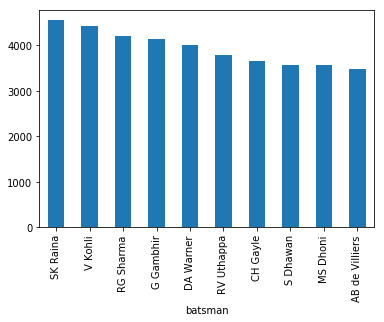

In [0]:
top = deliv.groupby(['batsman'])['batsman_runs'].sum()
top10=top.sort_values(ascending=False)[:10]
top10.plot.bar()

**Top Batsman's with 1's, 2's, 3's, 4's**

In [0]:
hsr[1].sort_values(ascending=False).head().reset_index()

,batsman,1
0,V Kohli,1410.0
1,RG Sharma,1379.0
2,SK Raina,1377.0
3,G Gambhir,1313.0
4,S Dhawan,1137.0


In [0]:
hsr[2].sort_values(ascending=False).head().reset_index()

,batsman,2
0,MS Dhoni,251.0
1,G Gambhir,245.0
2,SK Raina,242.0
3,V Kohli,242.0
4,DA Warner,207.0


In [0]:
hsr[3].sort_values(ascending=False).head().reset_index()

,batsman,3
0,M Vijay,17.0
1,S Dhawan,16.0
2,G Gambhir,15.0
3,AM Rahane,14.0
4,DA Warner,13.0


In [0]:
hsr[4].sort_values(ascending=False).head().reset_index()

,batsman,4
0,G Gambhir,484.0
1,SK Raina,402.0
2,DA Warner,401.0
3,S Dhawan,401.0
4,V Kohli,384.0


In [0]:
hsr[6].sort_values(ascending=False).head().reset_index()

,batsman,6
0,CH Gayle,266.0
1,SK Raina,174.0
2,RG Sharma,173.0
3,DA Warner,160.0
4,V Kohli,160.0


**Top Individual Scores**

In [0]:
tis = deliv.groupby(["id",'inning', "batsman"])["batsman_runs"].sum().reset_index()
tis.sort_values('batsman_runs', ascending=0).head()


,id,inning,batsman,batsman_runs
6217,411,1,CH Gayle,175
902,60,1,BB McCullum,158
8458,562,1,AB de Villiers,133
9289,620,1,AB de Villiers,129
5596,372,1,CH Gayle,128


**Highest score in each inning**

In [0]:
tisi = deliv.groupby(["id",'inning', "batsman"])["batsman_runs"].sum().reset_index()
tisi.sort_values('batsman_runs', ascending=0).head()
tisi['high_scorer']=""
tisi['high_scorer']=tisi.groupby(['id','inning'])['batsman_runs'].transform(max)
tisi = tisi[tisi['batsman_runs']==tisi['high_scorer']]
tisi

,id,inning,batsman,batsman_runs,high_scorer
5,1,1,Yuvraj Singh,62,62
7,1,2,CH Gayle,32,32
19,2,1,JC Buttler,38,38
30,2,2,SPD Smith,84,84
35,3,1,SK Raina,68,68
36,3,2,CA Lynn,93,93
39,4,1,BA Stokes,50,50
47,4,2,GJ Maxwell,44,44
53,5,1,KM Jadhav,69,69
66,5,2,RR Pant,57,57


**Individual Scores By Top Batsman each Inning**

In [0]:
btsmn=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner']
scores = deliv.groupby(["id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[tis['batsman'].isin(btsmn)]
scores

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,id,batsman,batting_team,batsman_runs
1,1,BCJ Cutting,Sunrisers Hyderabad,16
7,1,Mandeep Singh,Royal Challengers Bangalore,24
29,2,SPD Smith,Rising Pune Supergiant,84
35,3,JJ Roy,Gujarat Lions,14
37,3,SK Raina,Gujarat Lions,68
43,4,GJ Maxwell,Kings XI Punjab,44
51,5,A Mishra,Delhi Daredevils,8
79,6,MC Henriques,Sunrisers Hyderabad,52
80,6,P Kumar,Gujarat Lions,7
85,7,G Gambhir,Kolkata Knight Riders,19


### **Top Bowlers**

**Highest Wicket Taker**

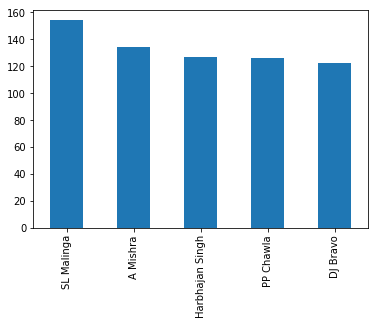

In [0]:
outs = ["bowled", "stumped", "caught", "lbw", "caught and bowled","hit wicket"]
hwt=deliv[deliv["dismissal_kind"].isin(outs)]
hwtaker=hwt['bowler'].value_counts()
hwtaker.head().plot.bar()

**Maximum Overs**

In [0]:
maxo=deliv.groupby(['bowler']).sum()
maxo['balls_count']=deliv['bowler'].value_counts()
maxo['overs_count']=(maxo['balls_count']//6)
maxo.sort_values(by='overs_count')['overs_count'].tail(5).reset_index()

,bowler,overs_count
0,PP Chawla,432
1,P Kumar,439
2,SL Malinga,449
3,A Mishra,450
4,Harbhajan Singh,498


**Most Economical Bowlers with 300+ overs**

In [0]:
maxo['economy']=(maxo['total_runs']/(maxo['overs_count']))
maxe = maxo[(maxo['overs_count']>300)]
maxe = maxe.sort_values('economy').head().economy.reset_index()
maxe

,bowler,economy
0,SP Narine,6.395706
1,R Ashwin,6.493639
2,DW Steyn,6.615599
3,SL Malinga,6.757238
4,Harbhajan Singh,6.933735


**Highest Dismissals for a Batsman by a Bowler**

In [0]:
hd = hwt[['batsman','bowler']]
hd = hd.groupby(['batsman','bowler']).size().reset_index().rename(columns={0:'count'})
hdbb = hd.sort_values(by='count',ascending = False)
hdbb = hdbb.drop_duplicates('batsman').reset_index()
hdbb

,index,batsman,bowler,count
0,3147,MS Dhoni,Z Khan,7
1,403,AM Rahane,B Kumar,6
2,5049,V Kohli,A Nehra,6
3,3887,RG Sharma,R Vinay Kumar,6
4,1553,G Gambhir,Z Khan,6
5,3418,PA Patel,B Kumar,5
6,4668,SR Watson,AR Patel,5
7,4424,SK Raina,Harbhajan Singh,5
8,550,AT Rayudu,MM Sharma,5
9,2205,KC Sangakkara,R Sharma,5


# Dream11

In [0]:
squad = []
mtd11 = mat[['id','season']]
mtd11 = mtd11.loc[mtd11['season']>=2015]
deld11 = deliv[['id','batsman','batsman_runs','bowler','dismissal_kind','fielder']]
mdd11 = pd.merge(mtd11,deld11,on='id',how='inner')
stumps = mdd11.groupby('fielder')['dismissal_kind'].agg(lambda x: (x=='stumped').sum()).reset_index()
stumps = stumps.sort_values(by='dismissal_kind',ascending=False).head().reset_index()
stumps = stumps.head()
wk = stumps['fielder'].unique()
wk = wk.tolist()

In [0]:
scrs = mdd11.groupby(["batsman"])["batsman_runs"].sum().reset_index()
scrs = scrs.sort_values(by='batsman_runs',ascending=False)
wt = scrs[scrs['batsman'].isin(wk)]
wkt = wt.iloc[0]['batsman']
bkpwkt = wt.iloc[1]['batsman']
scrs = scrs[scrs.batsman!=wkt]
scrs = scrs[scrs.batsman!=bkpwkt]
WicketKeeper = wt[:1]['batsman'].tolist()
bkpWicketKeeper = wt[1:2]['batsman'].tolist()
WicketKeeper,bkpWicketKeeper

(['RV Uthappa'], ['MS Dhoni'])

In [0]:
fielders = mdd11.groupby('fielder')['dismissal_kind'].agg(lambda x: (x=='caught').sum()).reset_index()
fielders = fielders.sort_values(by='dismissal_kind',ascending=False).reset_index()
best_fielders = fielders.head(100)
bf = best_fielders['fielder'].unique()
bf = bf.tolist()

In [0]:
btsms = scrs[scrs['batsman'].isin(bf)]
Batsmans = btsms[:4]['batsman'].tolist()
bkpBatsmans = btsms[4:6]['batsman'].tolist()
Batsmans,bkpBatsmans

(['DA Warner', 'V Kohli', 'AB de Villiers', 'AM Rahane'],
 ['S Dhawan', 'G Gambhir'])

In [0]:
saa=mdd11[mdd11["dismissal_kind"].isin(outs)]
blwr=saa['bowler'].value_counts().reset_index()
btsms = scrs[scrs['batsman'].isin(bf)]
wktsmean = blwr["bowler"].mean()
scrmean = btsms['batsman_runs'].mean()

In [0]:
allr = btsms.loc[btsms['batsman_runs']>500]
allr = allr[6:]
allrr = blwr.loc[blwr['bowler']>18]
allrr = allrr[6:]
allr1 = allrr['index'].unique()
allr1 = allr1.tolist()
alr = allr[allr['batsman'].isin(allr1)]
Allrounders = alr[:2]['batsman'].tolist()
bkpAllrounders = alr[2:]['batsman'].tolist()
Allrounders,bkpAllrounders

(['MC Henriques', 'SR Watson'], ['AD Russell'])

In [0]:
Bowlers = blwr[:4]['index'].tolist()
bkpBowlers = blwr[4:6]['index'].tolist()
Bowlers,bkpBowlers

(['B Kumar', 'YS Chahal', 'MJ McClenaghan', 'Sandeep Sharma'],
 ['DJ Bravo', 'AR Patel'])

In [0]:
Team11 = WicketKeeper + Batsmans +Allrounders + Bowlers
BackupPlayers = bkpWicketKeeper + bkpBatsmans + bkpAllrounders + bkpBowlers
Squad = Team11 + BackupPlayers

In [0]:
Team11

['RV Uthappa',
 'DA Warner',
 'V Kohli',
 'AB de Villiers',
 'AM Rahane',
 'MC Henriques',
 'SR Watson',
 'B Kumar',
 'YS Chahal',
 'MJ McClenaghan',
 'Sandeep Sharma']

In [0]:
Squad

['RV Uthappa',
 'DA Warner',
 'V Kohli',
 'AB de Villiers',
 'AM Rahane',
 'MC Henriques',
 'SR Watson',
 'B Kumar',
 'YS Chahal',
 'MJ McClenaghan',
 'Sandeep Sharma',
 'MS Dhoni',
 'S Dhawan',
 'G Gambhir',
 'AD Russell',
 'DJ Bravo',
 'AR Patel']

In [0]:
BackupPlayers

['MS Dhoni', 'S Dhawan', 'G Gambhir', 'AD Russell', 'DJ Bravo', 'AR Patel']

**Algorithms and their Accuracy**

In [0]:
mat.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
mat.replace(encode, inplace=True)
mat.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


In [0]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    mat[i] = le.fit_transform(mat[i])
mat.dtypes 

id                  int64
season              int64
city                int64
date               object
team1               int64
team2               int64
toss_winner         int64
toss_decision       int64
result             object
dl_applied          int64
winner              int64
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue               int64
umpire1            object
umpire2            object
dtype: object

In [0]:
x=mat.drop(['id','season','date','result','dl_applied','winner','player_of_match','umpire1','umpire2'],axis=1)
y=mat['winner']

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0) 
print(x_train,x_test,y_train,y_test)

     city  team1  team2  ...  win_by_runs  win_by_wickets  venue
546     7      5      2  ...            2               0     15
0      13     10      3  ...           35               0     23
404    13      9     10  ...            0               5     23
71     21      1      4  ...            0              10      4
263    21     13      5  ...            0               8      4
102    20      2      5  ...            3               0      7
435     6      9      6  ...            0               8     22
108     9      1      7  ...            0               5      8
342     7      9      5  ...            7               0     15
205     7      5      6  ...           23               0     15
578     6      9      8  ...            0               5     21
334     9     13      7  ...           20               0      8
298    21      1      6  ...            0              10     34
447     6      3      9  ...            0               6     22
317     9      5      7  

**Random Forest**

In [0]:
random_forest=RandomForestClassifier(n_estimators=17,max_depth=5)
random_forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
y_pred=random_forest.predict(x_test)
y_pred_train=random_forest.predict(x_train)

In [0]:
acc_score=metrics.accuracy_score(y_test,y_pred) #gives the accuracy of the model
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.581151832460733


**KNN Classifier**

In [0]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [0]:
y_pred=knn.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred) #gives the accuracy of the model
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.31413612565445026


In [0]:
y_pred=knn.predict(x_train)
acc_score=metrics.accuracy_score(y_train,y_pred) #gives the accuracy of the model
print("Accuracy of Train:", acc_score)

Accuracy of Train: 0.44719101123595506


**Decision Tree**

In [0]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=16)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=16,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
y_pred=dtree.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred) #gives the accuracy of the model
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.9267015706806283


In [0]:
y_pred=dtree.predict(x_train)
acc_score = metrics.accuracy_score(y_train,y_pred)
print("Accuracy of Train:", acc_score)

Accuracy of Train: 1.0


**Logistic Regression**

In [0]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_pred=logreg.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred) #gives the accuracy of the model
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.3036649214659686


In [0]:
y_pred=logreg.predict(x_train)
acc_score = metrics.accuracy_score(y_train,y_pred)
print("Accuracy of Train:", acc_score)

Accuracy of Train: 0.3415730337078652


**SVM**

In [0]:
svm=SVC(kernel='linear')  
svm.fit(x_train,y_train)`
y_pred=svm.predict(x_test)
y_pred_train=svm.predict(x_train) #y_pred is prediction of test data
acc_score=metrics.accuracy_score(y_test,y_pred) #gives the accuracy of the model
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.3089005235602094


In [0]:
acc_score = metrics.accuracy_score(y_train,y_pred_train)
print("Accuracy of Train:", acc_score)

Accuracy of Train: 0.44269662921348313


In [0]:
x.head(52).tail(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
51,52,2017,17,2017-05-13,8,10,10,1,normal,0,10,0,8,Mohammed Siraj,9,AK Chaudhary,Nitin Menon


## **Winner Prediction**

In [0]:
dictVal = encode['winner']

input=['8','10','10','1','0','10','0','8']
input = np.array(input).reshape((1, -1))
output=dtree.predict(input)
print(list(dictVal.keys())[list(dictVal.values()).index(output)])

RPS
